In [29]:
!pip install download

In [30]:
from download import download
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [32]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Oct 28 13:30 ..
-rw-r--r-- 1 root root 2835916 Oct 28 13:30 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Oct 28 13:30 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Oct 28 13:30 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Oct 28 13:30 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Oct 28 13:30 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Oct 28 13:30 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Oct 28 13:30 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Oct 28 13:30 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Oct 28 13:30 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Oct 28 13:30 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Oct 28 13:30 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [33]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [34]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')


In [36]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')


In [37]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)


/tmp/ipython-input-228315203.py:1: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
/tmp/ipython-input-228315203.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
/tmp/ipython-input-228315203.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'objec

In [38]:

aq_df.head()


,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [39]:
aq_df = aq_df.ffill()

In [40]:
from statsmodels.tsa.stattools import kpss

In [41]:
tstest = kpss(aq_df['TEMP'], 'ct')

/tmp/ipython-input-2713393483.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  tstest = kpss(aq_df['TEMP'], 'ct')


In [42]:
tstest

(np.float64(0.5452254399079532),
 np.float64(0.01),
 110,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Additive - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ec813268e453864276769e12a207c653f0ef67e6)

Multiplicative - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b3849db82617c2bd2cfe3dc5302496e6468020b9)

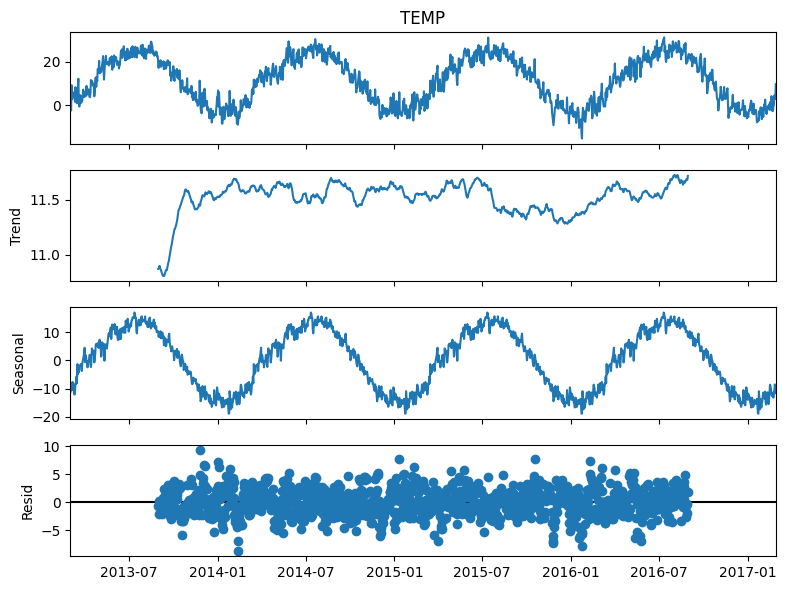

In [43]:
import pandas as pd
import statsmodels.api as sm

# Ensure a proper DatetimeIndex with a fixed daily frequency
aq_df = aq_df.sort_values('year_month_day_hour').set_index('year_month_day_hour').asfreq('D')

res = sm.tsa.seasonal_decompose(
    aq_df['TEMP'],
    model='additive',   # or 'multiplicative'
    period=365          # <- set the seasonal period here
)

res.plot();


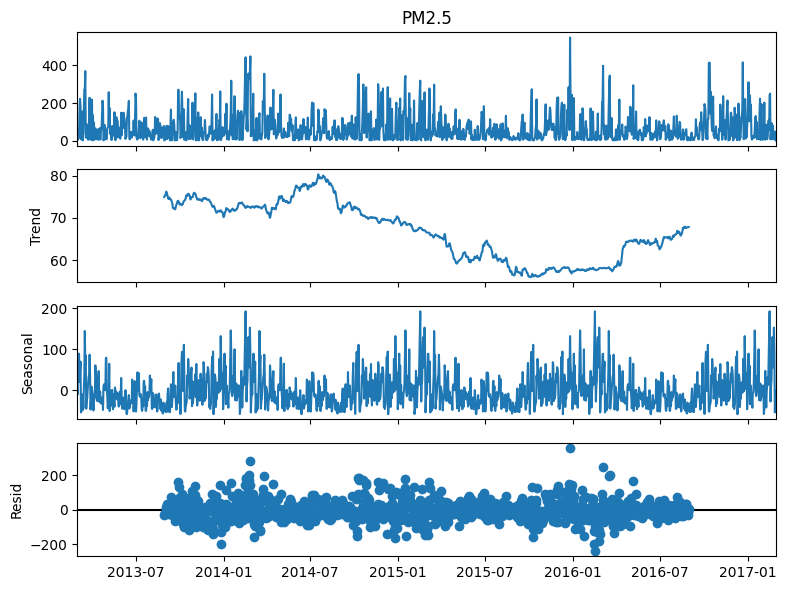

In [53]:
import pandas as pd
import statsmodels.api as sm

# Ensure a proper DatetimeIndex with a fixed daily frequency
# aq_df = aq_df.sort_values('year_month_day_hour').set_index('year_month_day_hour').asfreq('D')

res = sm.tsa.seasonal_decompose(
    aq_df['PM2.5'],
    model='additive',   # or 'multiplicative'
    period=365          # <- set the seasonal period here
)

res.plot();

In [44]:
res.observed

,TEMP
year_month_day_hour,
2013-03-01,-2.3
2013-03-02,-0.5
2013-03-03,-2.4
2013-03-04,9.2
2013-03-05,2.8
...,...
2017-02-24,0.2
2017-02-25,4.5
2017-02-26,2.9


In [45]:
print(res.trend)

year_month_day_hour
2013-03-01   NaN
2013-03-02   NaN
2013-03-03   NaN
2013-03-04   NaN
2013-03-05   NaN
              ..
2017-02-24   NaN
2017-02-25   NaN
2017-02-26   NaN
2017-02-27   NaN
2017-02-28   NaN
Freq: D, Name: trend, Length: 1461, dtype: float64


In [46]:
print(res.seasonal)

year_month_day_hour
2013-03-01   -11.588491
2013-03-02   -11.126208
2013-03-03    -7.995341
2013-03-04   -10.099907
2013-03-05   -10.602646
                ...    
2017-02-24   -11.062829
2017-02-25   -10.693057
2017-02-26    -8.523286
2017-02-27   -10.322281
2017-02-28   -11.588491
Freq: D, Name: seasonal, Length: 1461, dtype: float64


In [47]:
res.resid

,resid
year_month_day_hour,
2013-03-01,NaN
2013-03-02,NaN
2013-03-03,NaN
2013-03-04,NaN
2013-03-05,NaN
...,...
2017-02-24,NaN
2017-02-25,NaN
2017-02-26,NaN


In [ ]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [ ]:
bill_2018

Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).mean()

In [ ]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot();

Weighted moving average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n

In [ ]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

In [ ]:
bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot()

Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA


In [ ]:
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()

In [ ]:
bill_2018['ewm_window_3']=bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot()

Exponential Smoothing -

![alt text](https://people.duke.edu/~rnau/411avg_files/image028.png)

In [ ]:
bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

In [ ]:
bill_2018['esm_window_3_7']=bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018[['Billed_amount','esm_window_3_7']].plot()

In [ ]:
bill_2018.plot()

In [ ]:
bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean()

In [ ]:
bill_2018['esm_window_3_3']=bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018[['Billed_amount','esm_window_3_3']].plot()

In [ ]:
bill_2018[['Billed_amount','esm_window_3_7', 'esm_window_3_3']].plot()

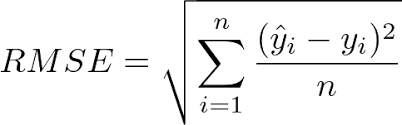

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

In [ ]:
ml_dict['FB_Prophet']['forecast']